In [196]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ivyha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [349]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd
from datetime import datetime, timedelta
import time
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
sentiment = SentimentIntensityAnalyzer()

In [376]:
scanteak_df = pd.read_csv("../Clean Data/clean_consolidated_scanteak (forum).csv")
castlery_df = pd.read_csv("../Clean Data/clean_consolidated_castlery (forum).csv")
wihardja_df = pd.read_csv("../Clean Data/clean_consolidated_wihardja (forum).csv")
star_living_df = pd.read_csv("../Clean Data/clean_consolidated_starliving (forum).csv")
grey_and_sanders_df = pd.read_csv("../Clean Data/clean_consolidated_greysanders (forum).csv")
teak_furniture_df = pd.read_csv("../Clean Data/clean_consolidated_furniture (forum).csv")

### Added additional lexicon

In [313]:
sentiment.lexicon['love'] = 2.2
sentiment.lexicon['fooled'] = -2
sentiment.lexicon['garbage'] = -2.5
sentiment.lexicon['beware'] = -2.5
sentiment.lexicon['false'] = -1.5
sentiment.lexicon['doubt'] = -1.5
sentiment.lexicon['give them a miss'] = -1.5
sentiment.lexicon['good'] = 1.5
sentiment.lexicon['terrible'] = -2.1

### Created Functions

In [240]:
def vader_sentiment(org_df):
    sentiment_df = pd.DataFrame(org_df[['Body','Year']])
    comment_list = org_df['Body'].tolist()

    tokenized = []
    total = 0
    neg = []
    neu = []
    pos = []    
    compound = []

    for comment in comment_list:
        tokenized.append(sent_tokenize(comment))
    
    for ctokenize in tokenized:
        if len(ctokenize) == 1:
            score = sentiment.polarity_scores(ctokenize[0])
            neg.append(score['neg'])
            neu.append(score['neu'])
            pos.append(score['pos'])
            compound.append(score['compound'])
        else:
            s_neg = []
            s_neu = []
            s_pos = []
            s_com = []
            for i in ctokenize:
                score = sentiment.polarity_scores(i)
                s_neg.append(score['neg'])
                s_neu.append(score['neu'])
                s_pos.append(score['pos'])
                s_com.append(score['compound'])
            neg.append(statistics.mean(s_neg))
            neu.append(statistics.mean(s_neu))
            pos.append(statistics.mean(s_pos))
            compound.append(statistics.mean(s_com))

    
    sentiment_df.insert(2, "Positive", pos)
    sentiment_df.insert(3, "Neutral", neu)
    sentiment_df.insert(4, "Negative", neg)
    sentiment_df.insert(5, "Compound", compound)
    
    return sentiment_df

In [323]:
def label_sentiment(df):
    labels = []
    for compounds in df['Compound']:
        if compounds >= 0.5:
            labels.append('Positive')
        elif compounds <= -0.5:
            labels.append('Negative')
        else:
            labels.append('Neutral')
    
    df["Sentiment"] = labels

### Implement Functions

In [377]:
scanteak_df = vader_sentiment(scanteak_df)
castlery_df = vader_sentiment(castlery_df)
wihardja_df = vader_sentiment(wihardja_df)
star_living_df = vader_sentiment(star_living_df)
grey_and_sanders_df = vader_sentiment(grey_and_sanders_df)
teak_furniture_df = vader_sentiment(teak_furniture_df)

In [378]:
label_sentiment(scanteak_df)
label_sentiment(castlery_df)
label_sentiment(wihardja_df)
label_sentiment(star_living_df)
label_sentiment(grey_and_sanders_df)
label_sentiment(teak_furniture_df)

### Export to csv

In [379]:
vader_sentiment(scanteak_df).to_csv("../Sentiment/vader/scanteak forum.csv")
vader_sentiment(castlery_df).to_csv("../Sentiment/vader/castlery forum.csv")
vader_sentiment(wihardja_df).to_csv("../Sentiment/vader/wihardja forum.csv")
vader_sentiment(star_living_df).to_csv("../Sentiment/vader/starLiving forum.csv")
vader_sentiment(grey_and_sanders_df).to_csv("../Sentiment/vader/greysanders forum.csv")
vader_sentiment(teak_furniture_df).to_csv("../Sentiment/vader/furniture forum.csv")

### Bar Plot

In [410]:
scanteak_df[scanteak_df['Sentiment'] == "Positive"].value_counts().sum()

9

<BarContainer object of 1 artists>

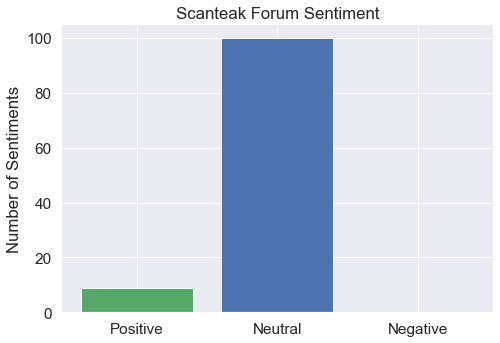

In [424]:
#ax = scanteak_df['Sentiment'].value_counts().plot(kind = 'bar', figsize = (14,8), title = "Scanteak Forum Sentiment")
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Scanteak Forum Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", scanteak_df[scanteak_df['Sentiment'] == "Positive"].value_counts().sum(), color = '#3182bd', width = 0.8)
ax.bar("Neutral", scanteak_df[scanteak_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", scanteak_df[scanteak_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

<BarContainer object of 1 artists>

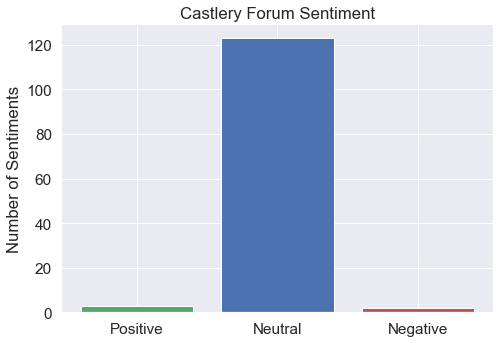

In [423]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Castlery Forum Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", castlery_df[castlery_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", castlery_df[castlery_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", castlery_df[castlery_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)


<BarContainer object of 1 artists>

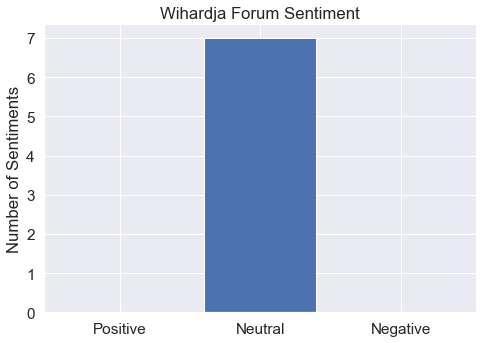

In [425]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Wihardja Forum Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", wihardja_df[wihardja_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", wihardja_df[wihardja_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", wihardja_df[wihardja_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

<BarContainer object of 1 artists>

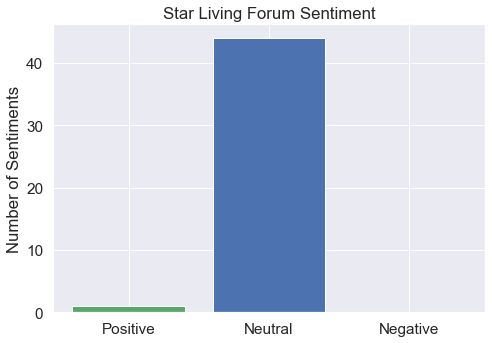

In [427]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Star Living Forum Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", star_living_df[star_living_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", star_living_df[star_living_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", star_living_df[star_living_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

<BarContainer object of 1 artists>

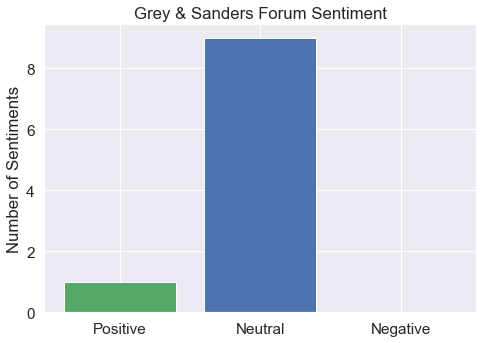

In [428]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Grey & Sanders Forum Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", grey_and_sanders_df[grey_and_sanders_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", grey_and_sanders_df[grey_and_sanders_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", grey_and_sanders_df[grey_and_sanders_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

<BarContainer object of 1 artists>

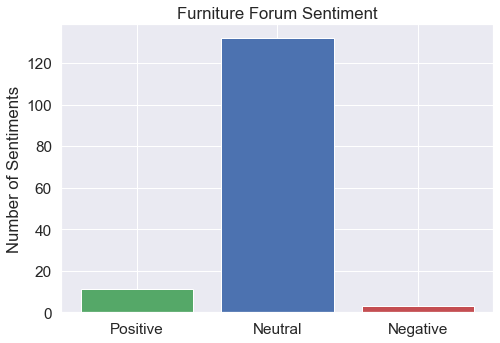

In [429]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.set_title("Furniture Forum Sentiment")
ax.set_ylabel('Sentiments')
ax.set_ylabel('Number of Sentiments')
ax.bar("Positive", teak_furniture_df[teak_furniture_df['Sentiment'] == "Positive"].value_counts().sum(), color = 'g', width = 0.8)
ax.bar("Neutral", teak_furniture_df[teak_furniture_df['Sentiment'] == "Neutral"].value_counts().sum(), color = 'b', width = 0.8)
ax.bar("Negative", teak_furniture_df[teak_furniture_df['Sentiment'] == "Negative"].value_counts().sum(), color = 'r', width = 0.8)

### Aggregate by Year

In [331]:
scanteak_time = scanteak_df.groupby("Year")
castlery_time = castlery_df.groupby("Year")
wihardja_time = wihardja_df.groupby("Year")
star_living_time = star_living_df.groupby("Year")
grey_sander_time = grey_and_sanders_df.groupby("Year")
teak_time = teak_furniture_df.groupby("Year")

In [332]:
scanteak_df_groupby = pd.DataFrame({'Year': sorted(scanteak_df.Year.unique())})
castlery_df_groupby = pd.DataFrame({'Year': sorted(castlery_df.Year.unique())})
wihardja_df_groupby = pd.DataFrame({'Year': sorted(wihardja_df.Year.unique())})
star_living_df_groupby = pd.DataFrame({'Year': sorted(star_living_df.Year.unique())})
grey_sander_df_groupby = pd.DataFrame({'Year': sorted(grey_and_sanders_df.Year.unique())})
teak_df_groupby = pd.DataFrame({'Year': sorted(teak_furniture_df.Year.unique())})

### Created functions to aggregate amount by groupby

In [333]:
def add_groupby(df, df_groupby):
    groupby_pos_avg = df.groupby("Year")['Positive'].transform("mean")
    groupby_neu_avg = df.groupby("Year")['Neutral'].transform("mean")
    groupby_neg_avg = df.groupby("Year")['Negative'].transform("mean")
    groupby_comp_avg = df.groupby("Year")['Compound'].transform("mean")

    df_groupby["Positive_Average"] = groupby_pos_avg
    df_groupby["Neutral_Average"] = groupby_neu_avg
    df_groupby["Negative_Average"] = groupby_neg_avg
    df_groupby["Compound_Average"] = groupby_comp_avg

### Created Function to Label Sentiment

In [340]:
def label_sentiment_group(groupby_df):
    labels = []
    for compounds in groupby_df['Compound_Average']:
        if compounds >= 0.5:
            labels.append('Positive')
        elif compounds <= -0.5:
            labels.append('Negative')
        else:
            labels.append('Neutral')
    
    groupby_df["Sentiment"] = labels

### Implement Functions

In [335]:
add_groupby(scanteak_df, scanteak_df_groupby)
add_groupby(castlery_df, castlery_df_groupby)
add_groupby(wihardja_df, wihardja_df_groupby)
add_groupby(star_living_df, star_living_df_groupby)
add_groupby(grey_and_sanders_df, grey_sander_df_groupby)
add_groupby(teak_furniture_df, teak_df_groupby)

In [341]:
label_sentiment_group(scanteak_df_groupby)
label_sentiment_group(castlery_df_groupby)
label_sentiment_group(wihardja_df_groupby)
label_sentiment_group(star_living_df_groupby)
label_sentiment_group(grey_sander_df_groupby)
label_sentiment_group(teak_df_groupby)

In [344]:
star_living_df_groupby

,Year,Positive_Average,Neutral_Average,Negative_Average,Compound_Average,Sentiment
0,2013,0.000000,0.976833,0.023167,-0.033492,Neutral
1,2014,0.073589,0.903142,0.023233,0.126775,Neutral
2,2016,0.073589,0.903142,0.023233,0.126775,Neutral
3,2018,0.073589,0.903142,0.023233,0.126775,Neutral
4,2019,0.073589,0.903142,0.023233,0.126775,Neutral
5,2020,0.073589,0.903142,0.023233,0.126775,Neutral
6,2021,0.153049,0.841394,0.005557,0.166250,Neutral


### Visualize Aggregated Data

#### Create Function for Visualization

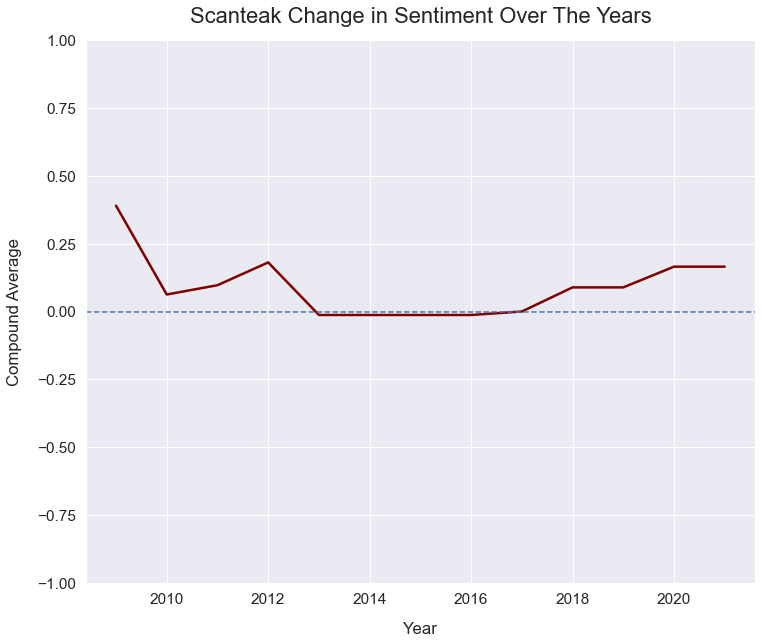

In [369]:
sns.set(font_scale=1.4)
axes = plt.gca()
scanteak_df_groupby.set_index('Year')['Compound_Average'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Compound Average", labelpad=15)
plt.title("Scanteak Change in Sentiment Over The Years", y=1.02, fontsize=22)
axes.set_ylim(-1,1)
plt.axhline(y=0, linestyle = '--')

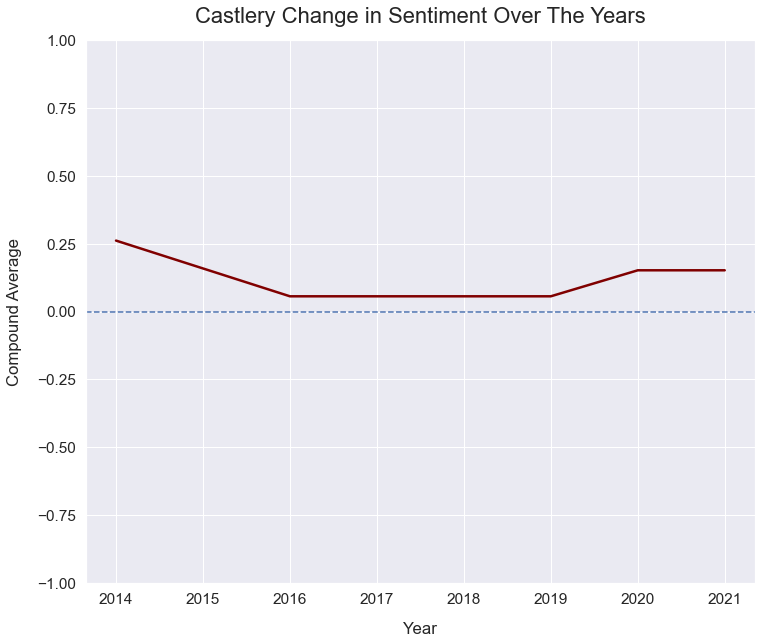

In [370]:
sns.set(font_scale=1.4)
axes = plt.gca()
castlery_df_groupby.set_index('Year')['Compound_Average'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Compound Average", labelpad=15)
plt.title("Castlery Change in Sentiment Over The Years", y=1.02, fontsize=22)
axes.set_ylim(-1,1)
plt.axhline(y=0, linestyle = '--')

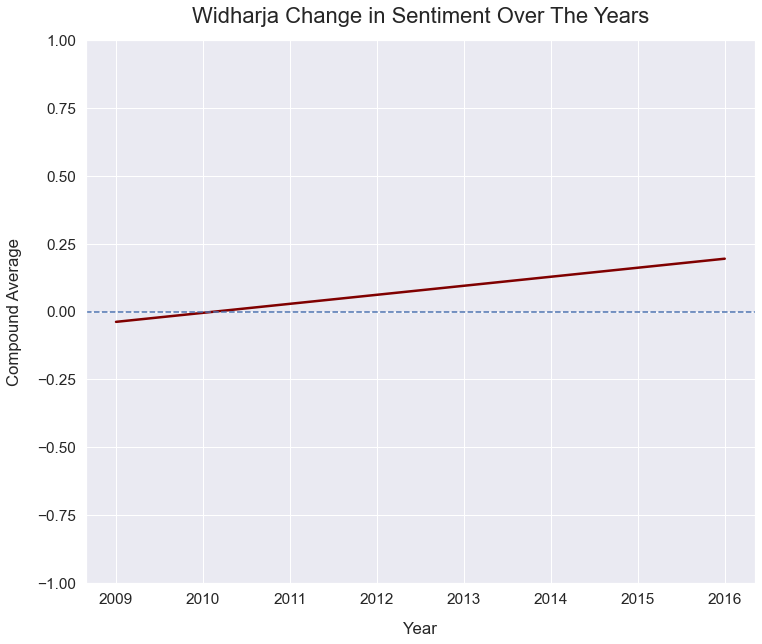

In [371]:
sns.set(font_scale=1.4)
axes = plt.gca()
wihardja_df_groupby.set_index('Year')['Compound_Average'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Compound Average", labelpad=15)
plt.title("Widharja Change in Sentiment Over The Years", y=1.02, fontsize=22)
axes.set_ylim(-1,1)
plt.axhline(y=0, linestyle = '--')

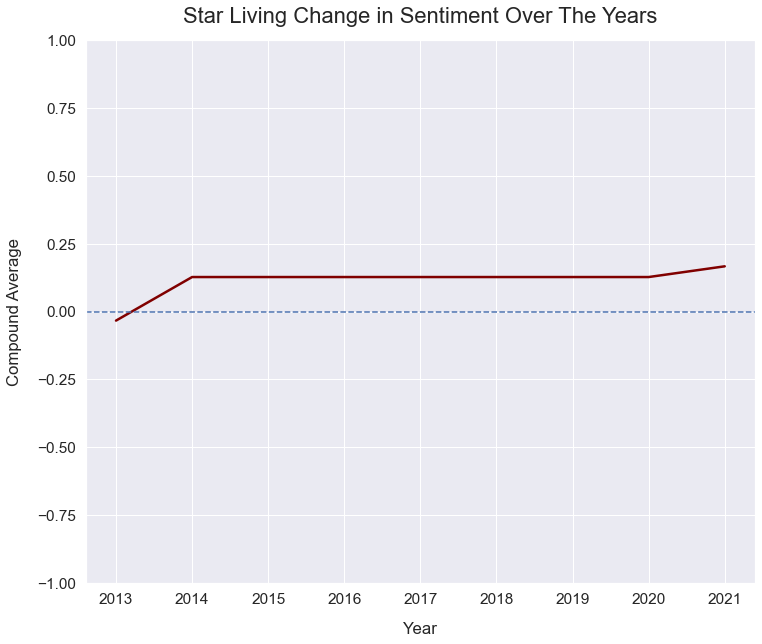

In [372]:
sns.set(font_scale=1.4)
axes = plt.gca()
star_living_df_groupby.set_index('Year')['Compound_Average'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Compound Average", labelpad=15)
plt.title("Star Living Change in Sentiment Over The Years", y=1.02, fontsize=22)
axes.set_ylim(-1,1)
plt.axhline(y=0, linestyle = '--')

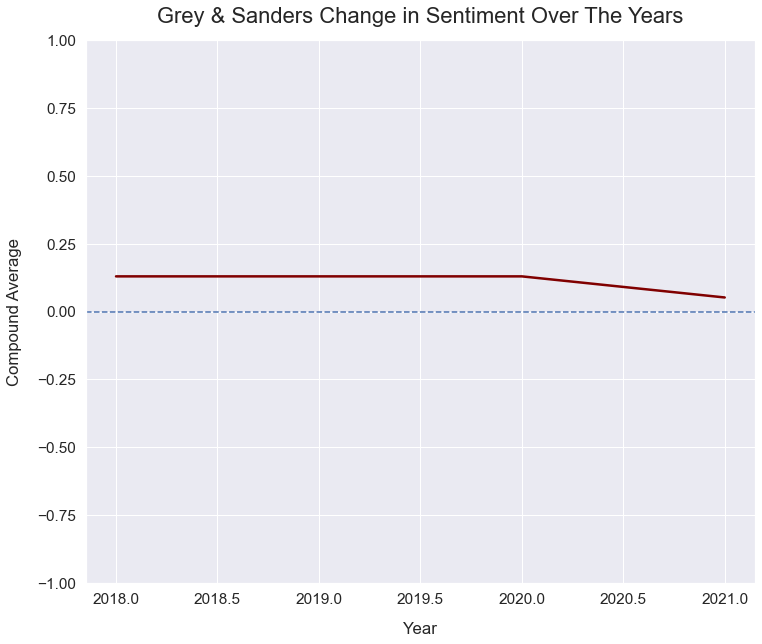

In [373]:
sns.set(font_scale=1.4)
axes = plt.gca()
grey_sander_df_groupby.set_index('Year')['Compound_Average'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Compound Average", labelpad=15)
plt.title("Grey & Sanders Change in Sentiment Over The Years", y=1.02, fontsize=22)
axes.set_ylim(-1,1)
plt.axhline(y=0, linestyle = '--')

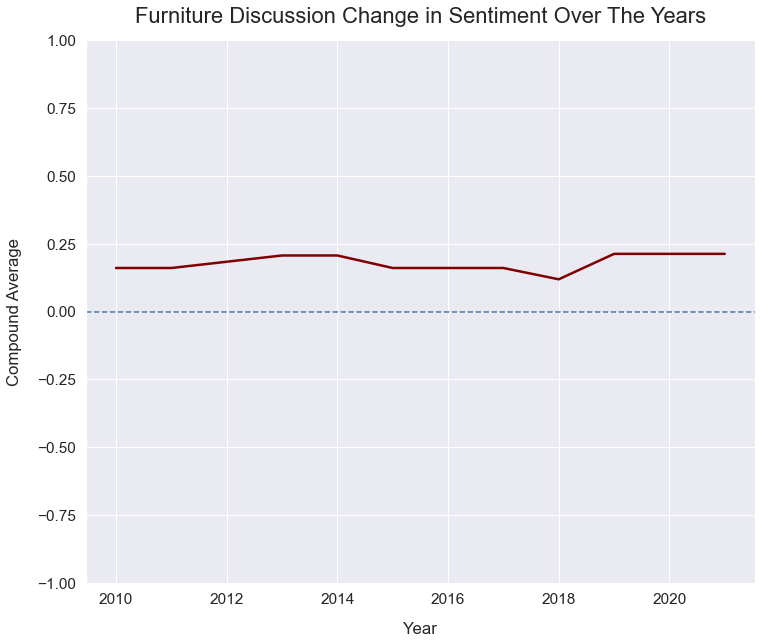

In [374]:
sns.set(font_scale=1.4)
axes = plt.gca()
teak_df_groupby.set_index('Year')['Compound_Average'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Compound Average", labelpad=15)
plt.title("Furniture Discussion Change in Sentiment Over The Years", y=1.02, fontsize=22)
axes.set_ylim(-1,1)
plt.axhline(y=0, linestyle = '--')